In [160]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

Importamos nuestro dataset

In [197]:
dataset = pd.read_csv('dataset_facturas.csv')
dataset

,Fecha Entrada Registro,Importe Total,GRUPO DE GASTOS,SUBGRUPO,Denominación Factura,Denominación Acreedor
0,09/02/2016,397.49,SEDE,SUMINISTROS,Suministro material eléct,MUÑOZ RADIO ELECTRICIDAD SL
1,12/02/2016,108.48,SEDE,SUMINISTROS,LATA BARNIZ POLIURETANO 5,FERRETERIA INDUSTRIAL ROMA SL
2,12/02/2016,570.78,ACTIVIDAD,MATERIAL INFORMÁTICO Y DE OFICINA,Suministro material de of,SEROF SA
3,22/02/2016,55.22,INDEMNIZACIONES POR RAZÓN DEL SERVICIO,DIETAS,Sevilla–Madrid–Sevilla,MANUEL MEDINA GUERRERO
4,23/02/2016,94.38,SEDE,MANTENIMIENTO,servicio manten.agua fuen,PURIFY HISPANIA SL
...,...,...,...,...,...,...
2127,25/03/2022,"156,56",INDEMNIZACIÓN RAZÓN SERVICIO,DIETAS,VIAJE SEV–MADRID–SEV,JOSE LUIS FALCÓN PLIEGO
2128,28/03/2022,"21,6",ACTIVIDAD DEL CONSEJO,DOCUMENTACIÓN Y PUBLICACIONES,"I–ADMINISTRACIÓN PÚBLICA,",ESPASA CALPE SA
2129,28/03/2022,"114,95",ACTIVIDAD DEL CONSEJO,GASTOS CONTENCIOSOS,MINUTA PROC.ORD. 303/2021,ELENA SÁNCHEZ DELGADO
2130,29/03/2022,"152,9",INDEMNIZACIÓN RAZÓN SERVICIO,DIETAS,BILLETES AVE SEV–MAD–SEV,MANUEL GONZÁLEZ SECO


Extraemos el primer número

In [198]:
df_digitos = pd.DataFrame(dataset['Importe Total'].str.slice(0, 1))
df_digitos.columns = ['Digitos']
df_digitos

,Digitos
0,3
1,1
2,5
3,5
4,9
...,...
2127,1
2128,2
2129,1
2130,1


Realizamos la agrupación por dígitos para contar cuantas veces aparece cada número en nuestro conjunto de datos

In [199]:
df_digitos_agrup = np.array(df_digitos[df_digitos['Digitos']!='0'].groupby(['Digitos']).size())
df_digitos_agrup

array([684, 407, 260, 169, 114, 141, 123,  79, 154], dtype=int64)

In [201]:
frecuencia = df_digitos_agrup/2132
frecuencia

array([0.32082552, 0.19090056, 0.12195122, 0.07926829, 0.05347092,
       0.06613508, 0.05769231, 0.03705441, 0.07223265])

Obtenemos la probabilidad de ocurrencia de cada dígito

In [203]:
digitos = np.arange(1,10)
lista = []
lista1 = []

for i in range(len(digitos)):
    lista.append(np.log10(1+(1/(i+1))))
    lista1.append(np.log10(1+(1/(i+1))) * 2132)

lista_prob = np.array(lista)
lista_ocurr = np.array(lista1)
prob_ocurr = np.column_stack((digitos, lista_prob, lista_ocurr, frecuencia, df_digitos_agrup))
df_prob_ocurr = pd.DataFrame(prob_ocurr, columns=[['Digito', 'Probabilidad', 'Ocurrencia_calculada', 'Frecuencia', 'Ocurrencia_medida']])
df_prob_ocurr

,Digito,Probabilidad,Ocurrencia_calculada,Frecuencia,Ocurrencia_medida
0,1.0,0.301030,641.795951,0.320826,684.0
1,2.0,0.176091,375.426564,0.190901,407.0
2,3.0,0.124939,266.369386,0.121951,260.0
3,4.0,0.096910,206.612148,0.079268,169.0
4,5.0,0.079181,168.814417,0.053471,114.0
5,6.0,0.066947,142.730555,0.066135,141.0
6,7.0,0.057992,123.638831,0.057692,123.0
7,8.0,0.051153,109.057178,0.037054,79.0
8,9.0,0.045757,97.554970,0.072233,154.0


Realizamos la gráfica

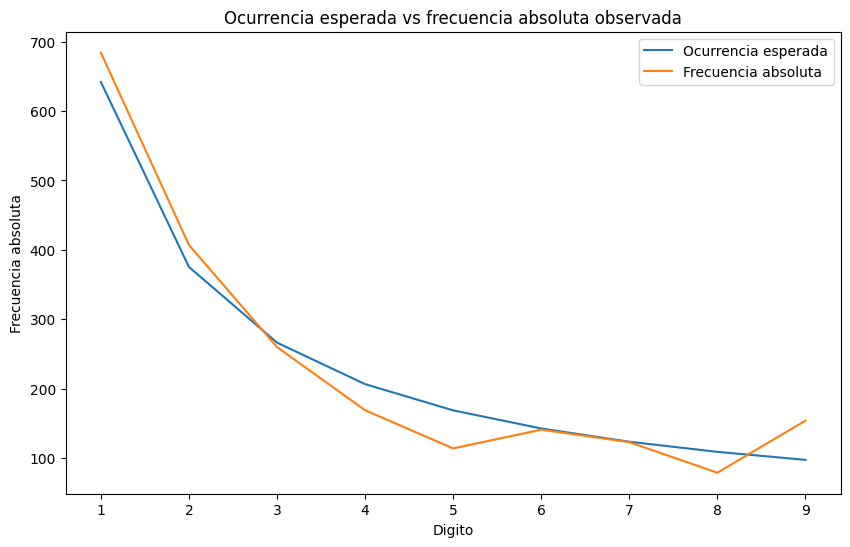

In [205]:
plt.figure(figsize=(10,6))
plt.plot(df_prob_ocurr.Digito, df_prob_ocurr.Ocurrencia_calculada)
plt.plot(df_prob_ocurr.Digito, df_prob_ocurr.Ocurrencia_medida)
plt.title('Ocurrencia esperada vs frecuencia absoluta observada')
plt.legend(["Ocurrencia esperada", "Frecuencia absoluta"], loc ="upper right")
plt.xlabel('Digito')
plt.ylabel('Frecuencia absoluta')
plt.savefig('Fig1')
plt.show()

Procedemos a realizar nuestra prueba de chi-cuadrada

Para esto utilizamos la fórmula $\chi^2 = \sum_{i} (observado_i - esperado_i)/esperado_i $

In [214]:
chi = ((df_digitos_agrup - lista_ocurr) * (df_digitos_agrup - lista_ocurr))/lista_ocurr
suma = 0

for i in chi:
    suma = suma + i

print(suma)

71.19556528584567
